In [73]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from pandas import plotting
from sklearn import preprocessing, decomposition
from sklearn.svm import LinearSVC, SVC
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import scipy.stats
import mglearn
import matplotlib.pyplot as plt
from sklearn import svm, metrics, preprocessing#機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用

[0.99095959]


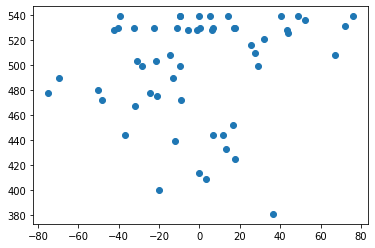

正答率 =  0.7647058823529411


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [117]:
# データの読み込み
df_sunlight = pd.read_csv('sunlight_hours.csv', index_col=0)
df_temp = pd.read_csv('NiigataKishou_temp.csv', index_col = 0)
df_humidity = pd.read_csv('arrange_humidity.csv', index_col = 0)
df_yield = pd.read_csv('niigata_rice_10a.csv', index_col = 0)

# dataframeから配列に変換
sunlight = df_sunlight['6'].values
temp = df_temp['6'].values
humidity = df_humidity['6'].values
rice_yield = np.array(df_yield['Yield/10a(t)'].values)

# 3つのデータの配列を55x3のnumpy2次元配列に変換
data = np.empty([0, 3])
for i in range(len(sunlight)):
    temp_array = np.array([sunlight[i], temp[i], humidity[i]])
    data = np.append(data, np.array([temp_array]), axis = 0)


# クラスラベルを生成. 1を豊作に.
    y_judge = np.empty([0,1])
for j in rice_yield:
    if j >= 480:
        y_judge = np.append(y_judge, 1)
    else:
        y_judge = np.append(y_judge, 0)

y_judge = np.array(y_judge, dtype=int)


# PCA 55x3の気候データを55x1の気候データに圧縮
pca = PCA(n_components=1)
pca.fit(data)
# 各主成分によってどの程度カバー出来ているかの割合(第一主成分，第二主成分)
print(pca.explained_variance_ratio_)

# 次元削減をdataに適用し, pca_pointに渡す.
pca_point = pca.transform(data) # pca_pointは55x1


# 気候データと収穫量の２次元のプロット
plt.scatter(pca_point, rice_yield)
plt.show()


# SVM
# pca_pointを標準化
sc=preprocessing.StandardScaler()
sc.fit(pca_point)
# 標準化をpca_pointに適用する．
pca_point=sc.transform(pca_point)



# ここで, pca_pointとrice_yieldで55行2列のデータを作らないといけない
X_data = np.empty([0, 2])
for i in range(len(pca_point)):
    temp_array = np.array([pca_point[i][0], rice_yield[i]])
    X_data = np.append(X_data, np.array([temp_array]), axis = 0)


# trainデータとtestデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_data, y_judge, test_size=0.3, random_state=None )

# SVM LinearSVC trainデータで訓練
clf_result=LinearSVC(loss='hinge', C=1.3,class_weight='balanced', random_state=0)#loss='squared_hinge' #loss="hinge", loss="log"
clf_result.fit(X_train, y_train)

#正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(y_test,pre)
print("正答率 = ",ac_score)



[[ 2.27096720e+00  1.21437691e+00  1.54407251e-01 -2.85893397e-01
  -2.91899865e-01 -1.18140028e+00  4.29412636e-01  1.46079879e+00
   2.12505427e-04  1.56927834e+00  2.15820691e+00 -3.17945497e-02
  -1.66761400e-01  1.89431345e-01  1.30147977e+00 -6.77536214e-01
   1.34975739e-02  1.94998170e-01 -1.21389406e+00  5.11009407e-01
  -3.29363304e-01 -9.71191799e-01  5.23478554e-01 -1.26431889e+00
   1.30446367e+00  9.54683907e-01  7.65638874e-01  8.18475434e-01
  -4.31982576e-01  2.00577101e+00 -9.20921589e-01 -6.43800541e-01
  -2.82807193e-01 -8.56332407e-01  8.69279162e-01 -2.07657797e+00
  -3.90075349e-01 -1.50816599e+00 -1.44918229e+00 -2.66623948e-01
  -2.23710838e+00 -7.29136398e-01 -6.33040546e-01 -9.60165967e-01
   5.01211531e-01 -1.10492779e+00  2.07002962e-01  3.51822909e-01
  -3.60593092e-01  3.93204763e-01  5.20826749e-01 -7.39791988e-03
   1.01969057e-01 -6.00568860e-01  1.08755718e+00]] [[539. 539. 539. 539. 539. 539. 539. 539. 539. 536. 531. 528. 528. 528.
  528. 530. 530. 5

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


TypeError: Input z must be at least a 2x2 array.

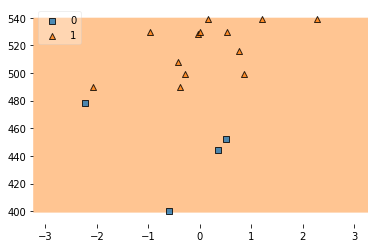

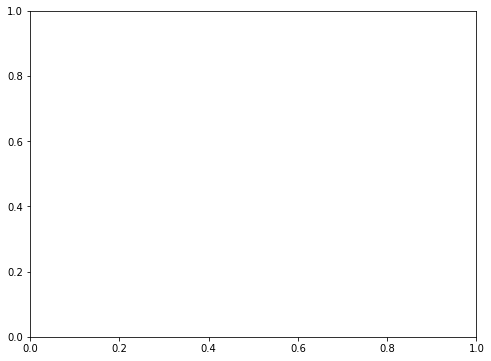

In [192]:
#plotする
X_train_plot=np.vstack(X_train)
y_train_plot=np.hstack(y_train)
X_test_plot=np.vstack(X_test)
y_test_plot=np.hstack(y_test)
#plot_decision_regions(X_train_plot, y_train_plot, clf=clf_result, res=0.01) #学習データをプロット
plot_decision_regions(X_test_plot, y_test_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット

y_judge = y_judge.reshape(1, -1)
#z = np.hstack([y_judge.T, y_judge.T])
z = np.hstack([y_judge])
x = X_data[:, 0].reshape(1, -1)
y = X_data[:, 1].reshape(1, -1)

print(x,y,z)
fig, ax = plt.subplots(figsize=(8, 6))
#ax.scatter(X_data[:, 0], X_data[:,1], s=7, cmap='tab10')
ax.contourf(x, y, z.T,alpha=0.4, cmap='Paired')
plt.show()
print(z.shape, X_data.shape)

In [147]:
x = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
#y座標方向に100個の値を取得                                                                                                                                                          
y = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
#上記のx,yを組み合わせた10000個の点のx座標と,y座標の配列を取得                                                                                                                       
x_g, y_g = np.meshgrid(x, y)
print(x_g.shape)

(100, 100)
